In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import random
from abc import ABC, abstractmethod 
import random
from numba import njit
from numba.experimental import jitclass
from numba import int32, float64
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import mpl_toolkits.mplot3d 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from cxplain.xkm import XkmExplainer
from cxplain.tree import  DecisionTreeExplainer, RandomForestExplainer, ExKMCExplainer
from cxplain.shap import  ShapExplainer
from cxplain.gradient import GradientExplainer  
from cxplain.metrics import EuclideanMetric, Metric, ManhattenMetric
from cxplain.neon import NeonKMeansExplainer
from cxplain.errors import NonExistingRelevanceError
from imputer import NormalCKDEImputer, EmpiricalRandomImputer, get_imputer
from datasets import IrisDataset, WineDataset, WholeSaleDataset, LiveSellersDataset, BuddyMoveDataset, SyntheticDataset

C:\Users\fottneal\Documents\code\cluster-explain\.venv\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\fottneal\Documents\code\cluster-explain\.venv\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

In [3]:
data = WholeSaleDataset.load_and_clean_dataset("../data/Wholesale customers data.csv")

n_clusters = data.n_clusters
X = data.features
y = data.targets
n_obs = data.n_obs
n_features = data.n_features
feature_names = data.feature_names

# fit Kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=3).fit(X)
cluster_centers = kmeans.cluster_centers_
predictions = kmeans.predict(X)
explained_clustering_next_best =  XkmExplainer(X,  kmeans.cluster_centers_, "next_best", "euclidean", predictions, feature_names).fit_explain()
explained_clustering_all = XkmExplainer(X,  kmeans.cluster_centers_, "all", "euclidean", predictions, feature_names).fit_explain()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [4]:
pointwise_relevance_next_best = explained_clustering_next_best.pointwise_relevance
cluster_relevance_next_best = explained_clustering_next_best.cluster_relevance
global_relevance_next_best = explained_clustering_next_best.global_relevance
pointwise_relevance_all = explained_clustering_all.pointwise_relevance
cluster_relevance_all = explained_clustering_all.cluster_relevance
global_relevance_all = explained_clustering_all.global_relevance

# plotting the importance of the features for a random subset of 10 features

In [5]:
random_observations = sorted(random.sample(range(0, data.n_obs + 1), 10))

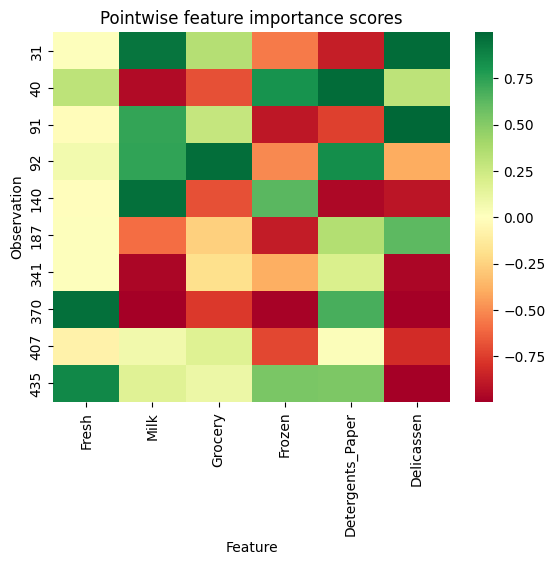

In [6]:
explained_clustering_next_best.show_pointwise_relevance(subset_index=random_observations)

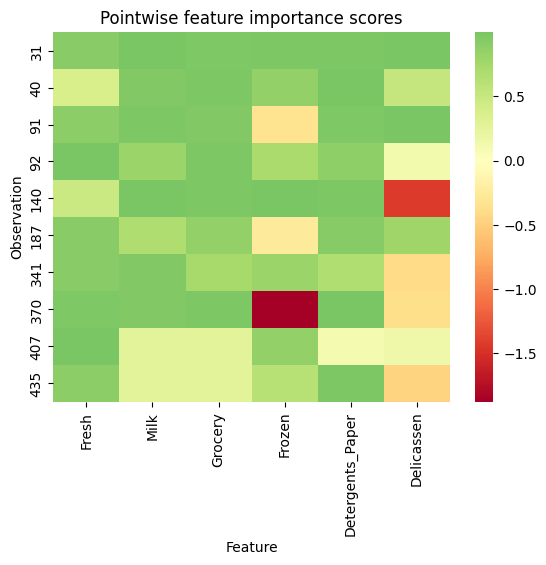

In [7]:
explained_clustering_all.show_pointwise_relevance(subset_index=random_observations)

In [8]:
# Plotting relevance for the clusters

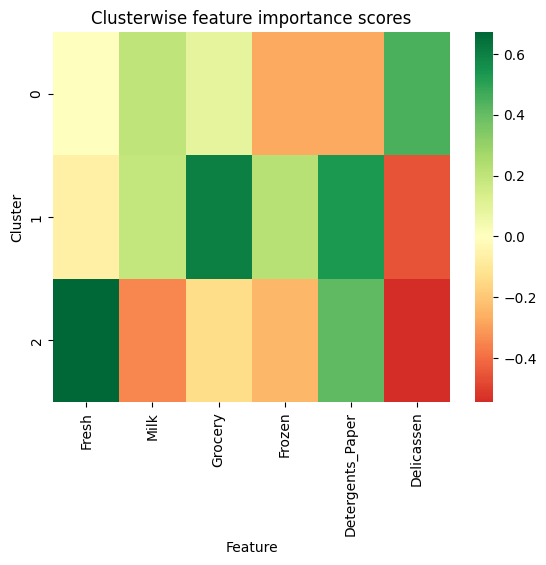

In [9]:
explained_clustering_next_best.show_cluster_relevance()

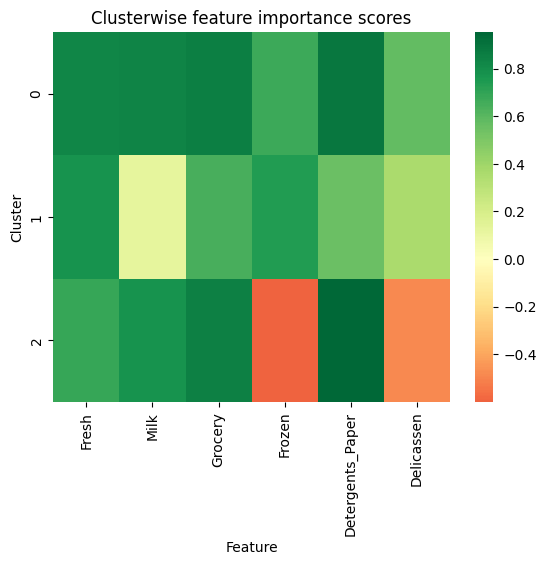

In [10]:
explained_clustering_all.show_cluster_relevance()

In [11]:
# Plot global relevance

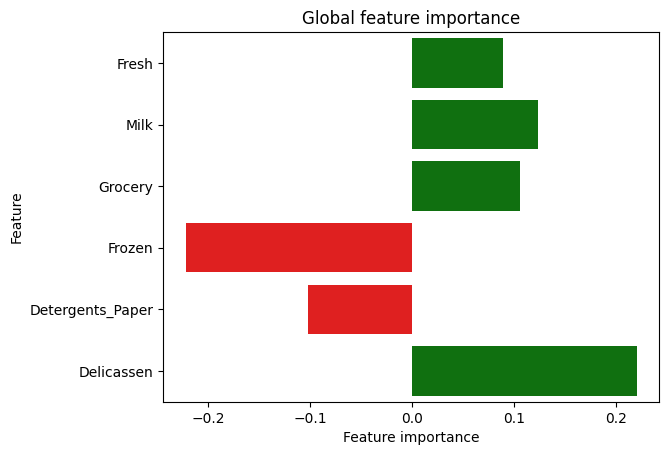

In [12]:
explained_clustering_next_best.show_global_relevance()

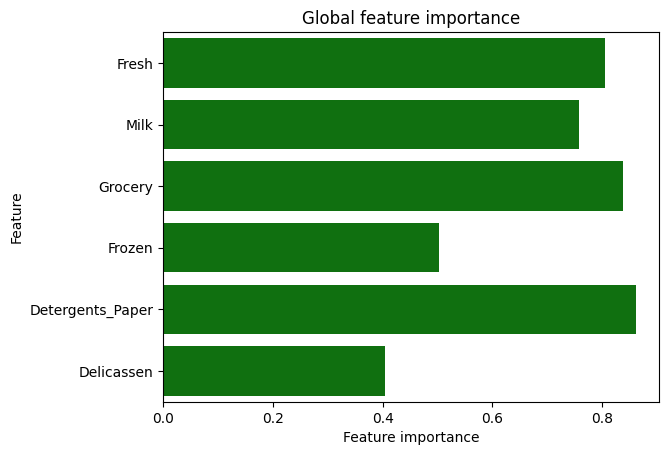

In [13]:
explained_clustering_all.show_global_relevance()